In [4]:
from ipfml import processing
from ipfml import utils
from PIL import Image
from scipy import signal
from skimage import color
import scipy.stats as stats
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [22]:
data_folder = "../fichiersSVD_light"

# MSCN analysis on Synthesis Images 

## Utils functions definition

In [23]:
def compute_images_path(scene, prefix, indices):
    images_path = []
    for index in indices:
        path = os.path.join(data_folder, os.path.join(scene, prefix + index + ".png"))
        print(path)
        images_path.append(path)
    return images_path

In [24]:
def display_mscn_distribution(images_path):
    
    images = []
    # compute mscn coefficients for each image
    for id, path in enumerate(images_path):
        #utils.divide_in_blocks()
        images.append(processing.get_mscn_coefficients(path))

    sns.set(rc={'figure.figsize':(25,20)})

    for id, img in enumerate(images):
        h = img.flatten()
        lm = sns.kdeplot(h, bw=.2, label=image_indices[id])
        lm.set_xlim(-0.4, 0.4)
        print(image_indices[id], " => ", np.var(h))
    
    plt.legend();

In [32]:
def display_sub_blocks_mscn_variance(images_path, block_size=(200, 200)):
    # study sub blocks variance for each noise level
    images_data = []
    # compute mscn coefficients for each image
    for id, path in enumerate(images_path):
        blocks = processing.divide_in_blocks(Image.open(path), block_size)
    
        data = []
    
        for block in blocks:
            mscn_coeff = processing.get_mscn_coefficients(block)
            data.append(np.var(mscn_coeff))
        
        images_data.append(data)
    
    for id, data in enumerate(images_data):
        plt.plot(np.sort(data), label=image_indices[id])
        print(np.sum(data))
        #lm.set_ylim(0, 0.02)
    
    plt.legend();

## Scenes MSCN variance analysis

### Appart01 scene 

In [29]:
scene_name = "Appart1opt02"
prefix_name = "appartAopt_"
image_indices = ["00020", "00050", "00100", "00200", "00300", "00500", "00900"]

In [30]:
images_path = compute_images_path(scene_name, prefix_name, image_indices)

../fichiersSVD_light/Appart1opt02/appartAopt_00020.png
../fichiersSVD_light/Appart1opt02/appartAopt_00050.png
../fichiersSVD_light/Appart1opt02/appartAopt_00100.png
../fichiersSVD_light/Appart1opt02/appartAopt_00200.png
../fichiersSVD_light/Appart1opt02/appartAopt_00300.png
../fichiersSVD_light/Appart1opt02/appartAopt_00500.png
../fichiersSVD_light/Appart1opt02/appartAopt_00900.png


00020  =>  0.0013007368923888193
00050  =>  0.0008614542685043583
00100  =>  0.000719609540073056
00200  =>  0.0006473836020377824
00300  =>  0.0006256486440919737
00500  =>  0.0006071633806632832
00900  =>  0.0005957700480215396


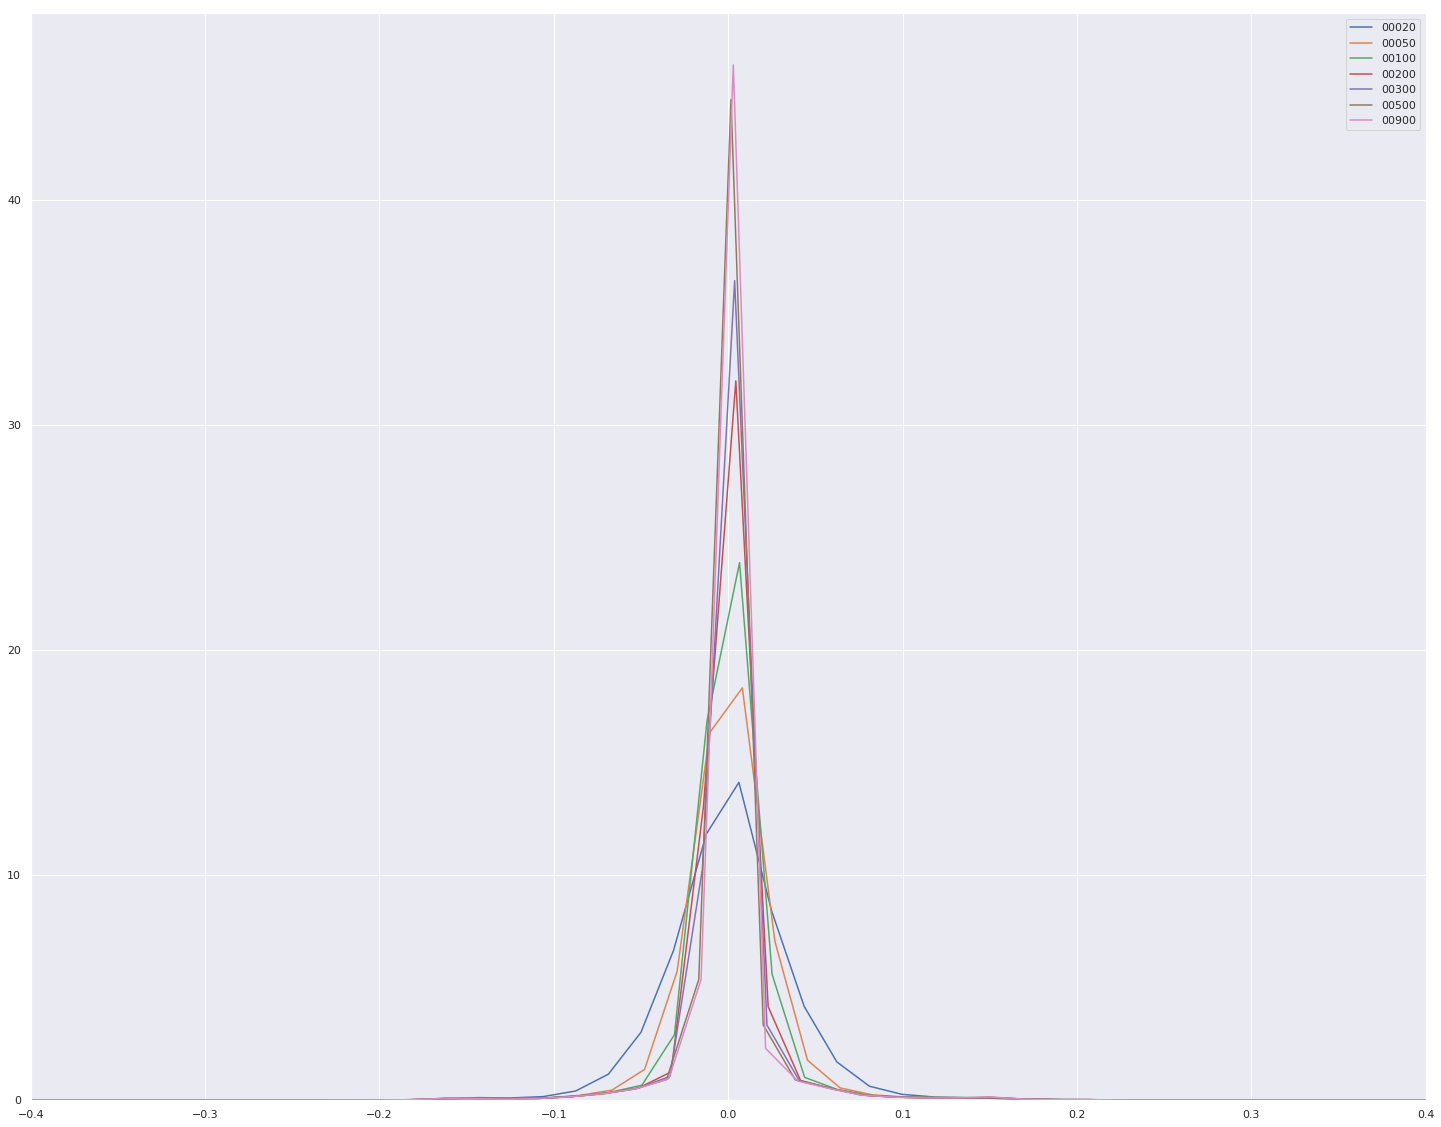

In [31]:
display_mscn_distribution(images_path)

0.02520092190807365
0.018740493024702046
0.016725281177852262
0.01570940662053287
0.01540647349408517
0.015147377152863321
0.014986084974476715


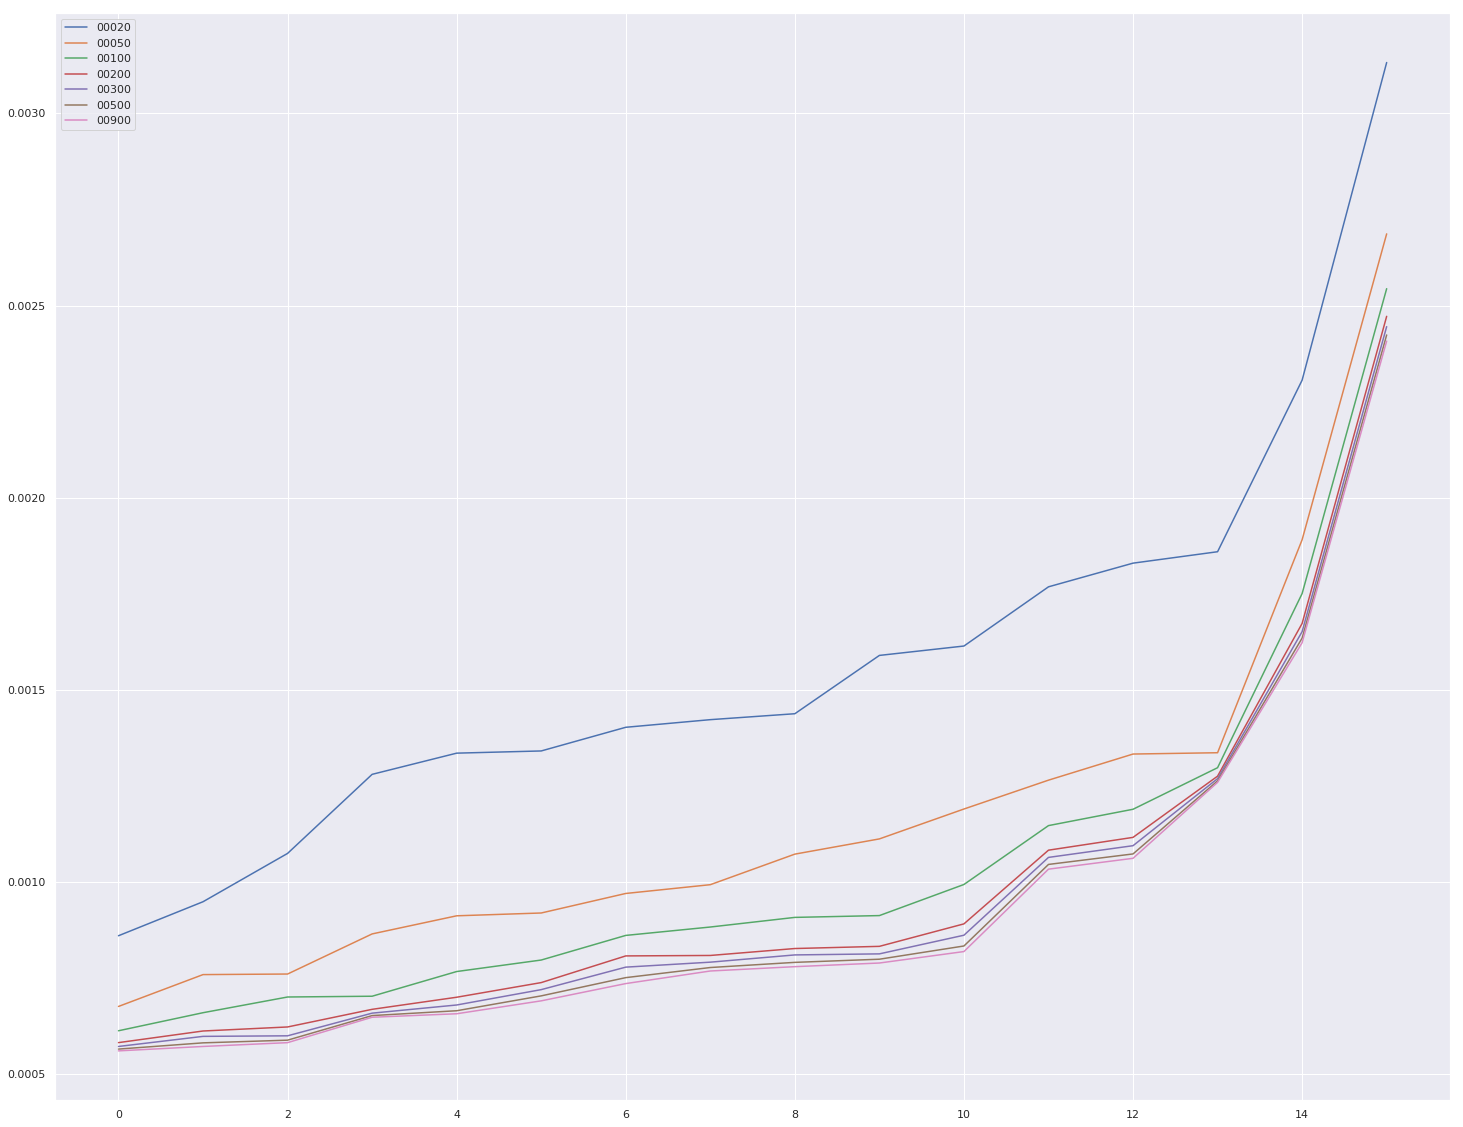

In [33]:
display_sub_blocks_mscn_variance(images_path, (200, 200))

### Cuisine01 analysis

In [40]:
scene_name = "Cuisine01"
prefix_name = "cuisine01_"
image_indices = ["00050", "00100", "00200", "00300", "00500", "00700", "01200"]

In [41]:
images_path = compute_images_path(scene_name, prefix_name, image_indices)

00050  =>  0.0009676431057037502
00100  =>  0.0008311065862023871
00200  =>  0.0007549075717485793
00300  =>  0.0007261569074363732
00500  =>  0.0007007603214148727
00700  =>  0.0006893560383379428
01200  =>  0.0006775955930850441


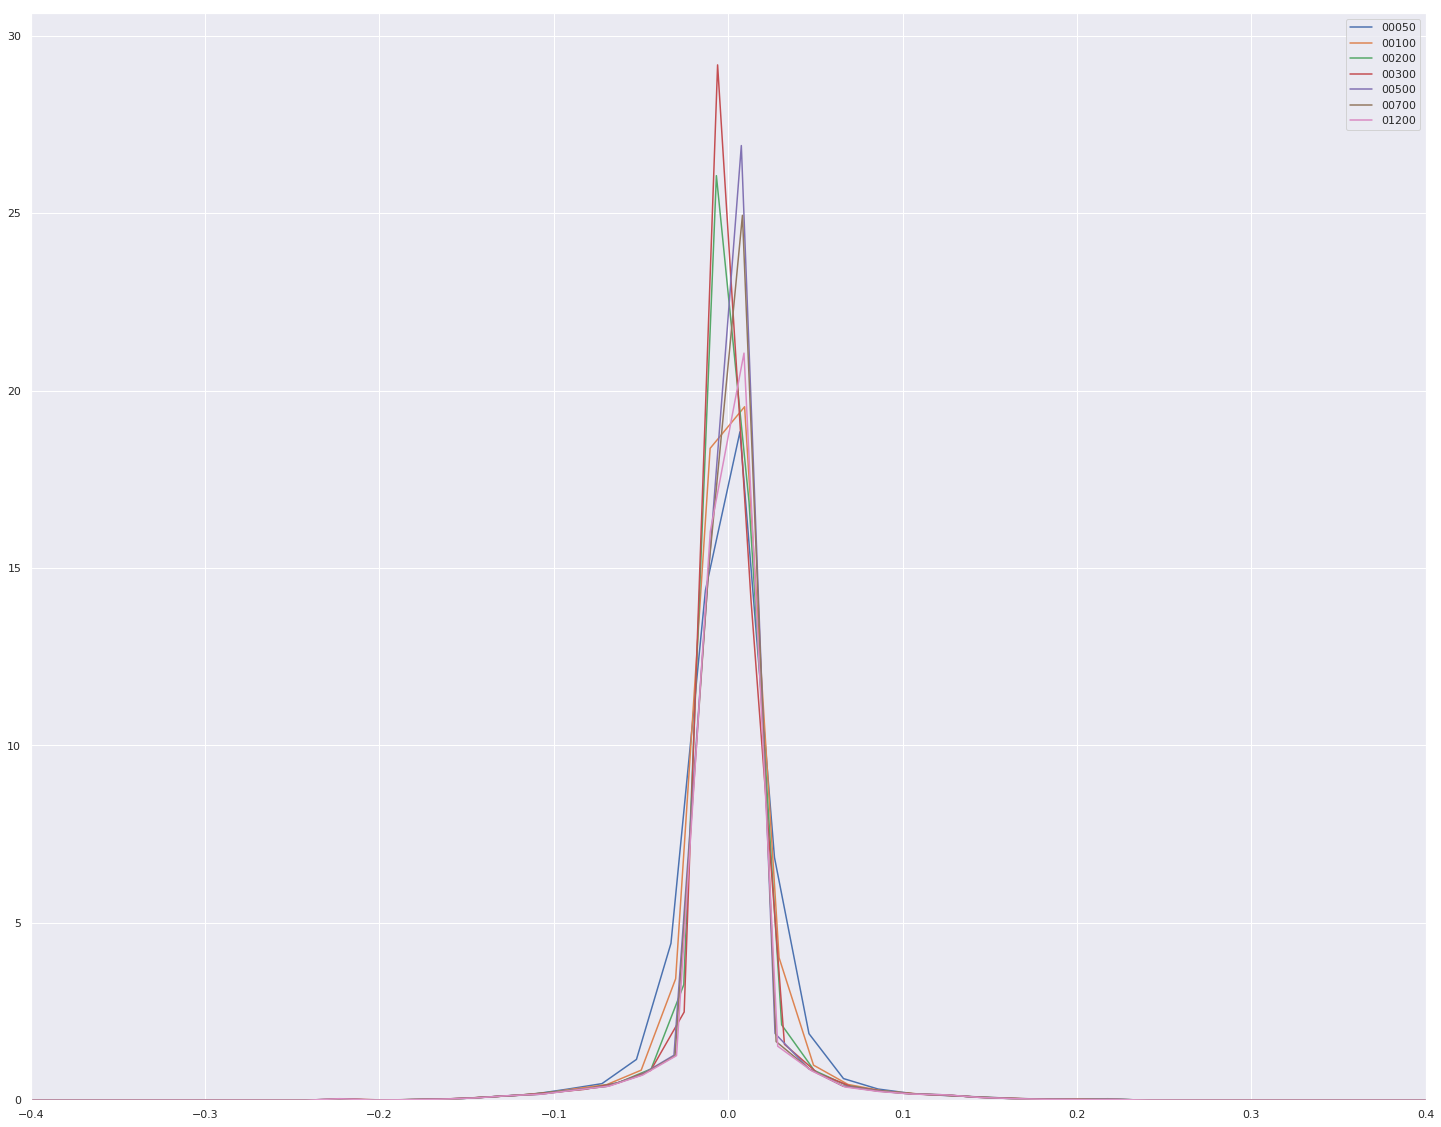

In [42]:
display_mscn_distribution(images_path)

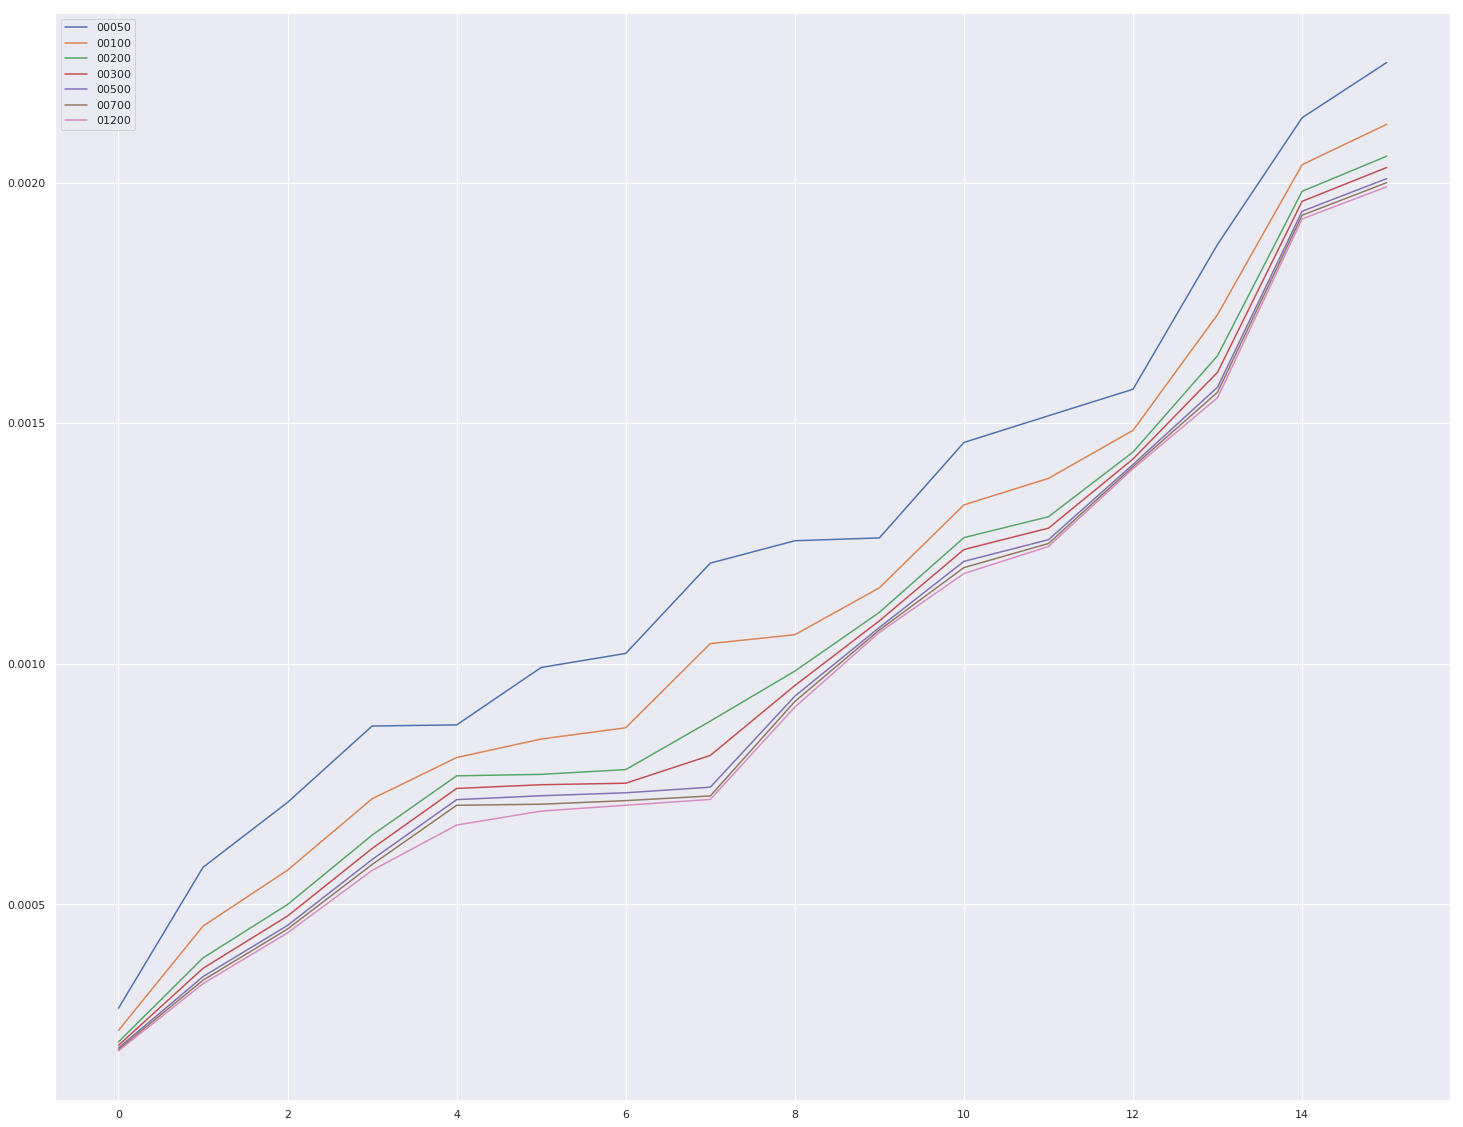

In [51]:
display_sub_blocks_mscn_variance(images_path, (200, 200))

### SdbCentre scene 

In [52]:
scene_name = "SdbCentre"
prefix_name = "SdB2_"
image_indices = ["00020", "00050", "00100", "00200", "00300", "00500", "00950"]

In [53]:
images_path = compute_images_path(scene_name, prefix_name, image_indices)

00020  =>  0.0016604521051226918
00050  =>  0.0013706824329176718
00100  =>  0.0012544892464109027
00200  =>  0.0011779373876287965
00300  =>  0.0011510806500284946
00500  =>  0.0011294743486697598
00950  =>  0.0011079734601166956


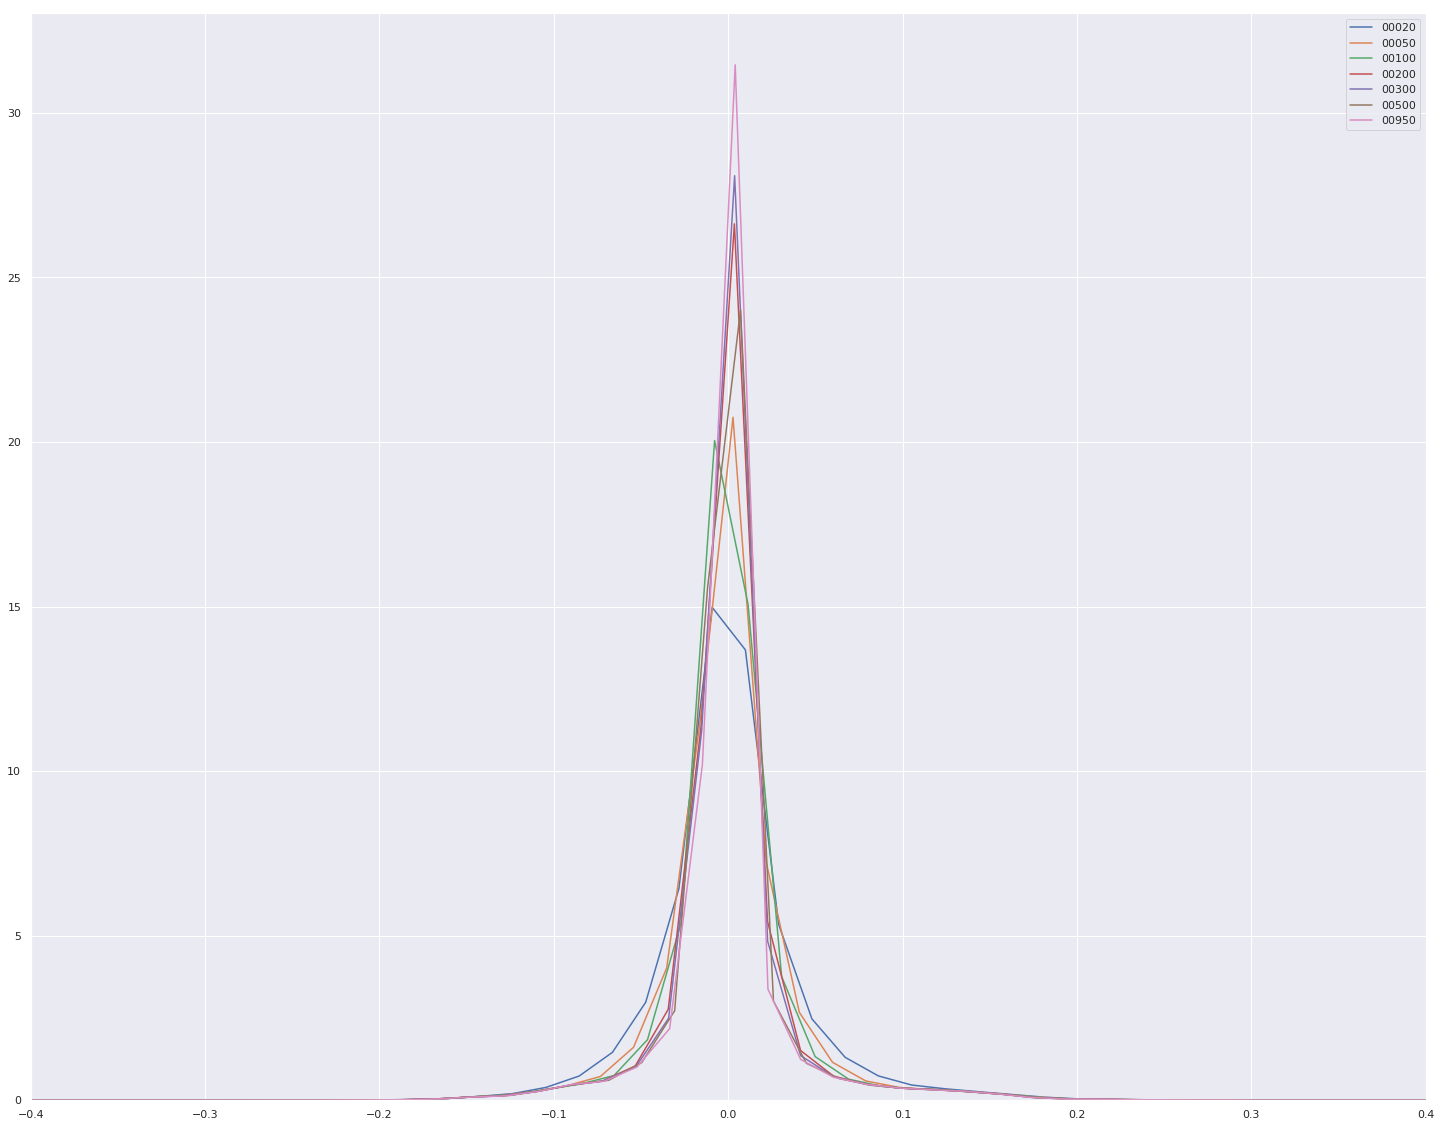

In [54]:
display_mscn_distribution(images_path)

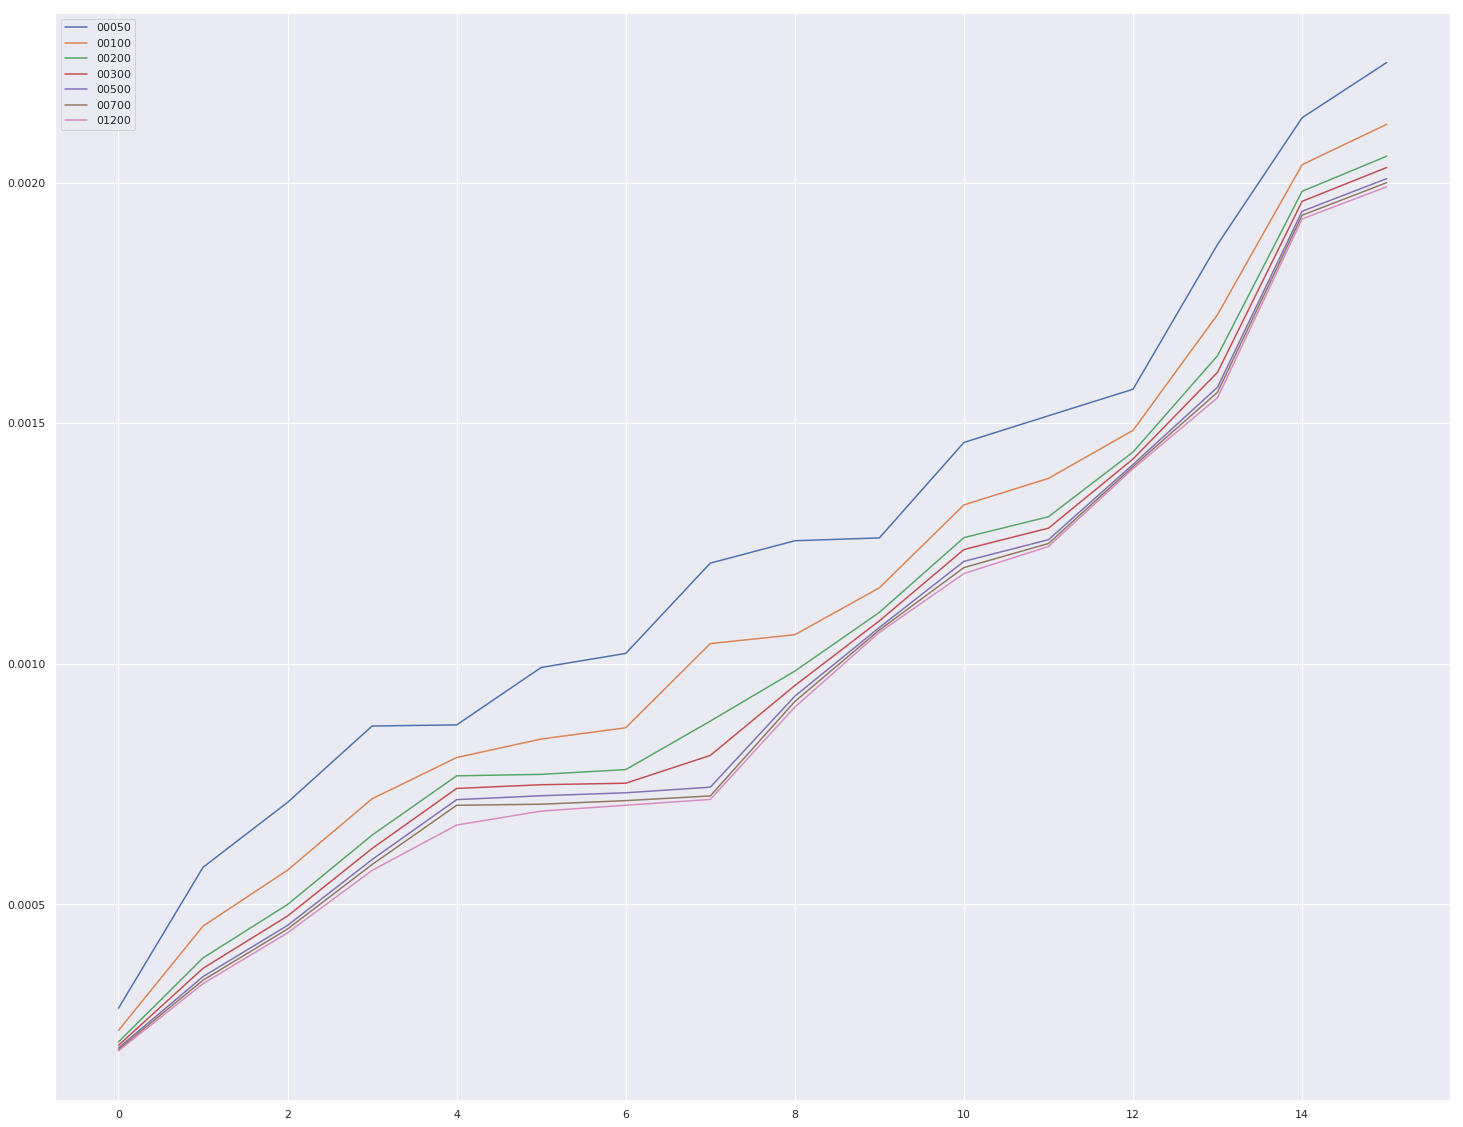

In [49]:
display_sub_blocks_mscn_variance(images_path, (200, 200))